In [1]:
import sys
sys.path.append('..')


In [2]:
import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'


In [3]:
from gax import sersic
from gax.sersic import sersic_2d_linear_pix
from matplotlib import pyplot as plt
import jax
import jax.numpy as jnp
import astropy
import numpy as np
from astropy.table import Table, vstack
import gax_fits as gfits
from astropy.io import fits
from scipy.interpolate import RegularGridInterpolator
from matplotlib.patches import Circle

bands = np.array(['u','g','r','i','z'])
wavs = np.array([354.3e-9, 477.0e-9, 623.1e-9, 762.5e-9, 913.4e-9], dtype=float)



In [4]:
# Get GZ2 table:
GZ2 = gfits.Read_Table('/home/borge/Data/gz2and1master.fits.gz')

In [5]:
# M101 - High def Case study

M101_UV      = gfits.Read('/home/borge/Data/Case_studies/HST/M101/m101_uv.fits')
M101_Optical = gfits.Read('/home/borge/Data/Case_studies/HST/M101/m101_optical.fits')
M101_IR      = gfits.Read('/home/borge/Data/Case_studies/HST/M101/m101_ir.fits')

# M51 - High def Case study

M51_B        = gfits.Read('/home/borge/Data/Case_studies/HST/M51/m51_optical_B.fits')
M51_G        = gfits.Read('/home/borge/Data/Case_studies/HST/M51/m51_optical_G.fits')
M51_R        = gfits.Read('/home/borge/Data/Case_studies/HST/M51/m51_optical_R.fits')      





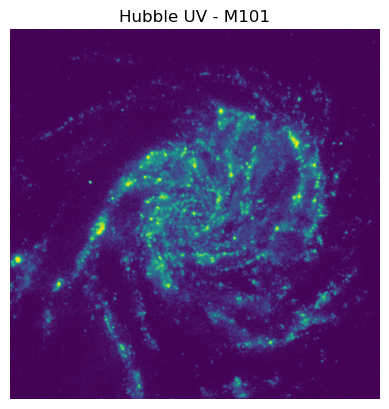

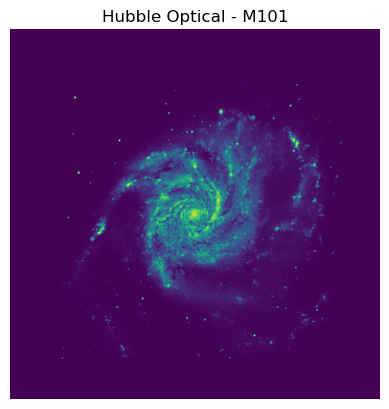

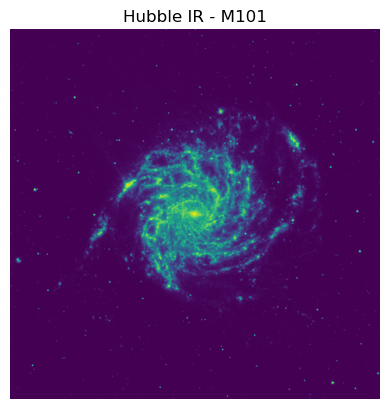

In [6]:
# M101 - Plotting

plt.figure()
plt.axis('off')
plt.title('Hubble UV - M101')
plt.imshow(M101_UV)

plt.figure()
plt.axis('off')
plt.title('Hubble Optical - M101')
plt.imshow(M101_Optical)

plt.figure()
plt.axis('off')
plt.title('Hubble IR - M101')
plt.imshow(M101_IR)


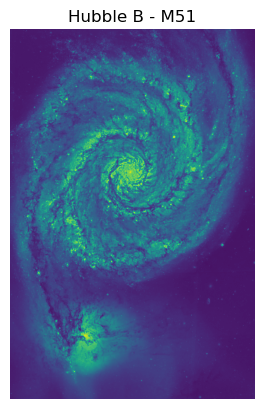

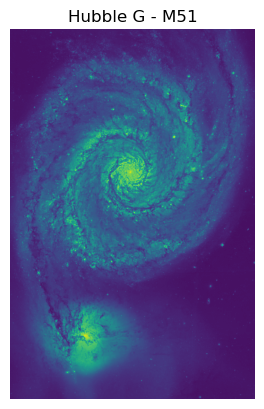

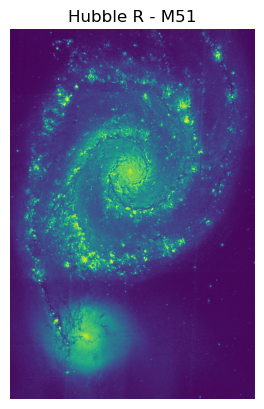

In [7]:
# M51 - Plotting

plt.figure()
plt.axis('off')
plt.title('Hubble B - M51')
plt.imshow(M51_B)

plt.figure()
plt.axis('off')
plt.title('Hubble G - M51')
plt.imshow(M51_G)

plt.figure()
plt.axis('off')
plt.title('Hubble R - M51')
plt.imshow(M51_R)


# Check 

In [8]:
# First get SDSS ID's for searching NSA.fits file

M51_SDSS_ID = 1237668296598749280

# M101 - doesn't have an SDSS ID think have  found a table info



In [9]:
# First search galaxy zoo for objects between the 

M51_RA  = 202.469649065
M51_DEC = 47.195225388

# look for M51 in GZ2
mask = ((GZ2['RA'] >= (202.469649065-0.1)) & (GZ2['RA'] <= 202.469649065+0.1)) & ((GZ2['DEC'] >= (47.195225388-0.1)) & (GZ2['DEC'] <= 47.195225388+0.1))

# apply mask to GZ2
filtered_GZ2 = GZ2[mask]

In [10]:
filtered_GZ2

<Table length=0>
OBJID OBJID_STR  RUN  ... gz2_arms_clean arms_clean_intersect arms_clean_union
int64   str20   int16 ...      bool              bool               bool      
----- --------- ----- ... -------------- -------------------- ----------------

In [11]:
M101_table = gfits.Read_Table('/home/borge/Data/Case_studies/HST/M101/tractor-2109p542.fits')

# M101_table # Not what we are looking for

In [12]:
# Check if the images has a background:

M51_B[0,0],M51_G[0,0],M51_R[0,0],M101_UV[0,0],M101_Optical[0,0],M101_IR[0,0]

# doesn't look like there is a consistent background

(2313, 1285, 771, 257, 0, 6939)

In [13]:
np.mean(M51_B[0:20,0:20]),np.mean(M51_G[0:20,0:20]),np.mean(M51_R[0:20,0:20]),np.mean(M101_UV[0:20,0:20]),np.mean(M101_Optical[0:20,0:20]),np.mean(M101_IR[0:20,0:20])

(4922.1925, 3284.46, 1594.685, 186.9675, 0.0, 361.085)

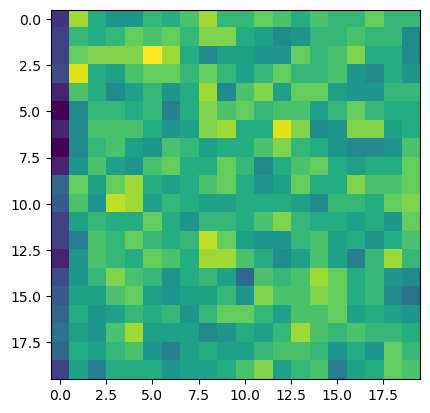

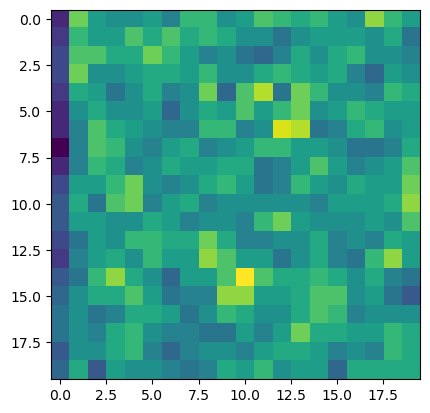

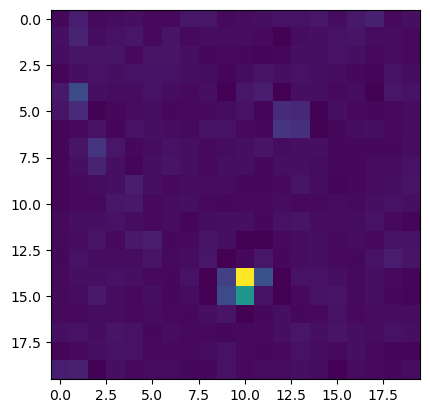

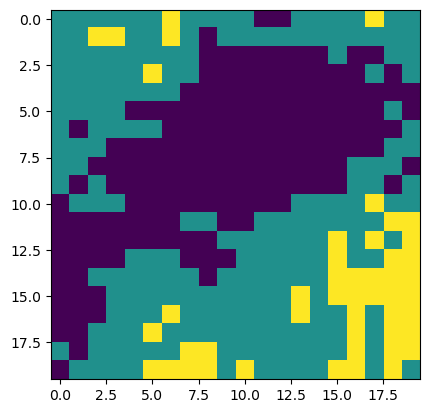

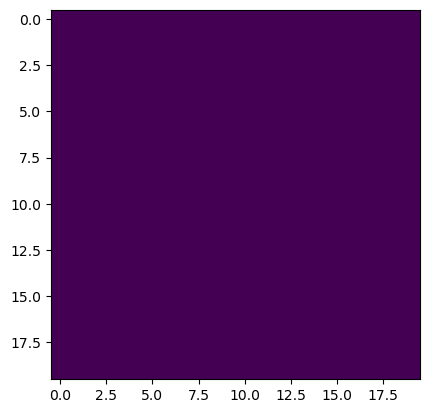

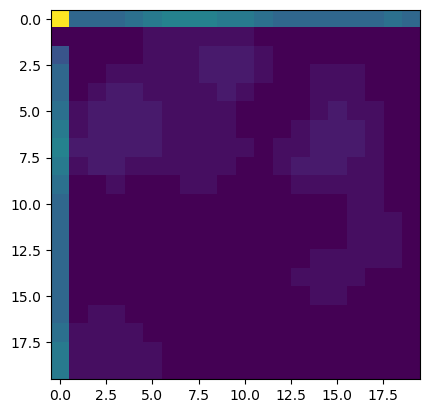

In [14]:
plt.figure()
plt.imshow(M51_B[0:20,0:20])
plt.figure()
plt.imshow(M51_G[0:20,0:20])
plt.figure()
plt.imshow(M51_R[0:20,0:20])
plt.figure()
plt.imshow(M101_UV[0:20,0:20])
plt.figure()
plt.imshow(M101_Optical[0:20,0:20])
plt.figure()
plt.imshow(M101_IR[0:20,0:20])

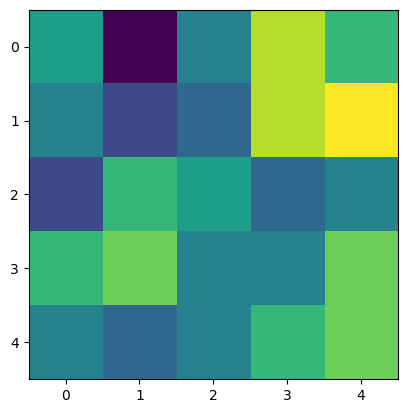

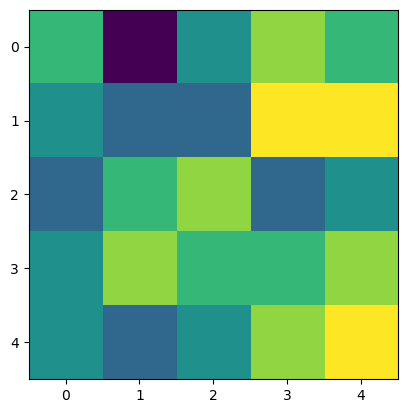

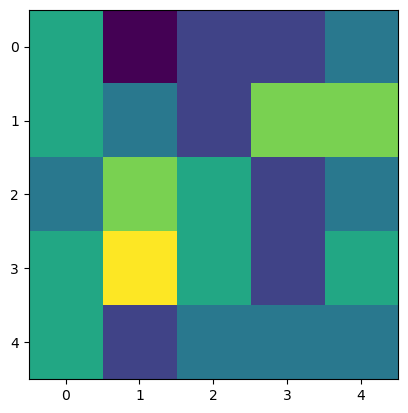

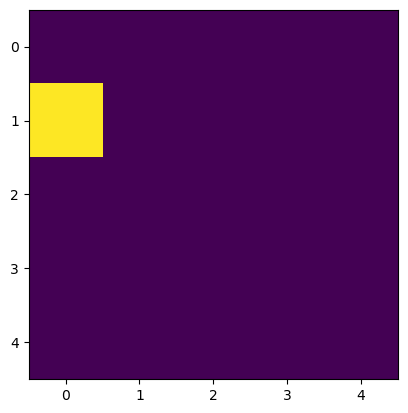

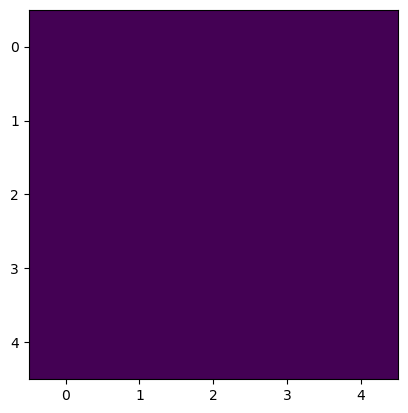

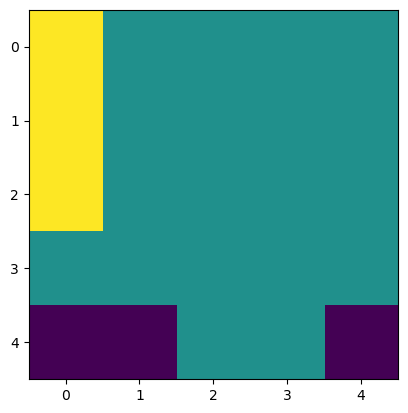

In [15]:
plt.figure()
plt.imshow(M51_B[5:10,5:10])
plt.figure()
plt.imshow(M51_G[5:10,5:10])
plt.figure()
plt.imshow(M51_R[5:10,5:10])
plt.figure()
plt.imshow(M101_UV[5:10,5:10])
plt.figure()
plt.imshow(M101_Optical[5:10,5:10])
plt.figure()
plt.imshow(M101_IR[5:10,5:10])

In [16]:
M51_B_m = np.mean(M51_B[5:10,5:10])
M51_G_m = np.mean(M51_G[5:10,5:10])
M51_R_m = np.mean(M51_R[5:10,5:10])


M101_UV_m = np.mean(M101_UV[5:10,5:10])
M101_Optical_m = np.mean(M101_Optical[5:10,5:10])
M101_IR_m = np.mean(M101_IR[5:10,5:10])


M51_B_std = np.std(M51_B[5:10,5:10])
M51_G_std = np.std(M51_G[5:10,5:10])
M51_R_std = np.std(M51_R[5:10,5:10])


M101_UV_std = np.std(M101_UV[5:10,5:10])
M101_Optical_std = np.std(M101_Optical[5:10,5:10])
M101_IR_std = np.std(M101_IR[5:10,5:10])


print('M51_B: ',M51_B_m,M51_B_std)
print('M51_G: ',M51_G_m,M51_G_std)
print('M51_R: ',M51_R_m,M51_R_std)

print('\n')

print('M101_B: ',M101_UV_m,M101_UV_std)
print('M101_G: ',M101_Optical_m,M101_Optical_std)
print('M101_R: ',M101_IR_m,M101_IR_std)

# These didnt really help because of the standard deviation being too high instead will exmamine
# flux numbers as numbers rather than colour

M51_B:  5098.88 542.4100530041825
M51_G:  3248.48 383.81726068534226
M51_R:  1367.24 305.99193191978117


M101_B:  10.28 50.361509111622134
M101_G:  0.0 0.0
M101_R:  257.0 125.90377277905536


In [17]:
M51_B[5:10,5:10] 

array([[5140, 3855, 4883, 5911, 5397],
       [4883, 4369, 4626, 5911, 6168],
       [4369, 5397, 5140, 4626, 4883],
       [5397, 5654, 4883, 4883, 5654],
       [4883, 4626, 4883, 5397, 5654]], dtype=uint16)

In [18]:
M51_G[5:10,5:10]

array([[3341, 2313, 3084, 3598, 3341],
       [3084, 2827, 2827, 3855, 3855],
       [2827, 3341, 3598, 2827, 3084],
       [3084, 3598, 3341, 3341, 3598],
       [3084, 2827, 3084, 3598, 3855]], dtype=uint16)

In [19]:
M51_R[5:10,5:10]

array([[1542,  771, 1028, 1028, 1285],
       [1542, 1285, 1028, 1799, 1799],
       [1285, 1799, 1542, 1028, 1285],
       [1542, 2056, 1542, 1028, 1542],
       [1542, 1028, 1285, 1285, 1285]], dtype=uint16)

In [20]:
M101_UV[5:10,5:10] # This must a zero background the 257 is anomalous

array([[  0,   0,   0,   0,   0],
       [257,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=uint16)

In [21]:
M101_Optical[5:10,5:10] # this must be a zero backround

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint16)

In [22]:
M101_IR[5:10,5:10] # This must be 257 background

array([[514, 257, 257, 257, 257],
       [514, 257, 257, 257, 257],
       [514, 257, 257, 257, 257],
       [257, 257, 257, 257, 257],
       [  0,   0, 257, 257,   0]], dtype=uint16)

In [23]:
# More noisy background use the mean 
M51_B_background = int(M51_B_m)
M51_G_background = int(M51_G_m)
M51_R_background = int(M51_R_m)

# Less noisy use assumed values
M101_UV_background = 0
M101_Optical_background = 0
M101_IR_background = 257


In [24]:
# Search GZ2 catalog for Candidate number: 587736584426094619 - Shivani's suggestion
GZ2_Data = gfits.Read_Table('/home/borge/Data/gz2and1master.fits.gz')

cand_ID = 587736584426094619

candidate_mask = GZ2_Data['OBJID'] == cand_ID

candidate_row = GZ2_Data[candidate_mask]


#candidate_row['']

In [25]:
Table_cand, Comp_cand = gfits.Composite_from_directory_raid('588017724937142430','/home/borge/Data/Output_Data/Distributed_run/')
Table_R = Table_cand[2]

In [26]:
Table_R

q = float(Table_R['q'])
x0 = int(Table_R['x']+ Comp_cand.shape[1]/2)
y0 = int(Table_R['y']+ Comp_cand.shape[0]/2)
centre = (x0,y0)
theta = float(Table_R['theta'])

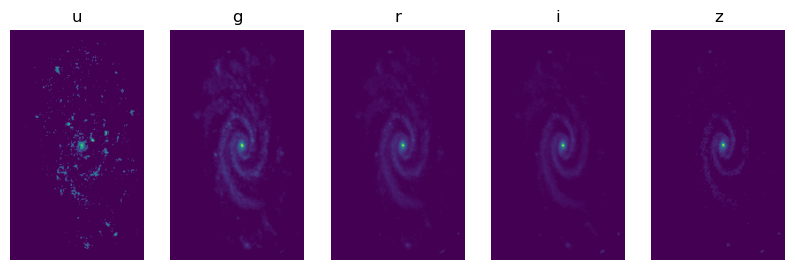

In [27]:
gfits.Composite_imshow(Comp_cand)

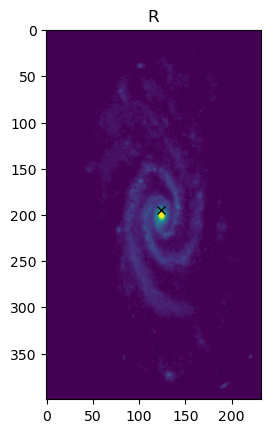

In [28]:
R_comp = Comp_cand[:,:,2]

plt.figure() 
plt.title('R')
plt.plot(int(Table_R['x']) + Comp_cand.shape[1]/2,int(Table_R['y']) + Comp_cand.shape[0]/2,'kx')
plt.imshow(R_comp,vmin=0,vmax=300)

In [29]:
deprojected_R = gfits.deproject_galaxy_image(R_comp,centre,theta,q)
print(q)
print(theta)

0.3963925481036036
1.4213024836580053


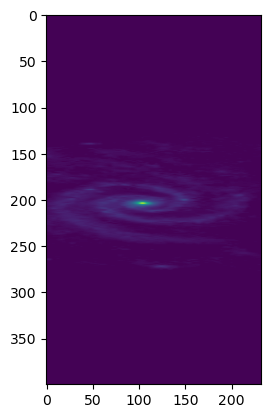

In [30]:
plt.figure()
plt.imshow(deprojected_R)

In [31]:
# This looks os shit we are not deprojecting

In [32]:
# Choose NGC 2857 - 587732050555961424

# Get Table and Composite:
#Table_2857, Comp_2857 = gfits.Composite_from_directory_raid('587732050555961424','/home/borge/Data/Output_Data/Distributed_run/')

# This will not work as the U band is missing
# Instead make a loop using the directory raid function
directory_paths = np.array(['/home/borge/Data/Output_Data/Distributed_run/587732050555961424ga',
                            '/home/borge/Data/Output_Data/Distributed_run/587732050555961424ra',
                            '/home/borge/Data/Output_Data/Distributed_run/587732050555961424ia',
                            '/home/borge/Data/Output_Data/Distributed_run/587732050555961424za',])

g_band = gfits.Read('/home/borge/Data/Output_Data/Distributed_run/587732050555961424ga/0200/small_nonpar.fits')

Empty_Comp = np.empty((g_band.shape[0],g_band.shape[1],4))



for i in range(0,len(directory_paths)):
    loop_Table, Empty_Comp[:,:,i] = gfits.raid_directory(directory_paths[i])
    
    if i == 0:
        Empty_Table = loop_Table
    else:
        Empty_Table = vstack([Empty_Table, loop_Table])
    
    
    
    


In [33]:
Empty_Table

<Table length=4>
       log_n               log_re       ...         y         
      float64             float64       ...      float64      
-------------------- ------------------ ... ------------------
 -0.5115816753128385   1.70318678291276 ...  34.13391807989434
 -0.4770184691845073  1.712119938924742 ...  37.16726311825352
-0.41909554689846584 1.6120838747522783 ...  35.20522286870247
-0.19113781857249168 1.6601343535929862 ... 33.445283140877905

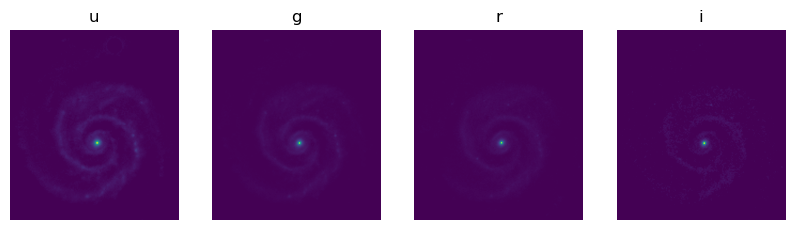

In [34]:
gfits.Composite_imshow(Empty_Comp)

(1,) 160
(1,) 160
Winding angle φ = -14.560275619356032  Pattern position angle θ =  -1.5876504469928865


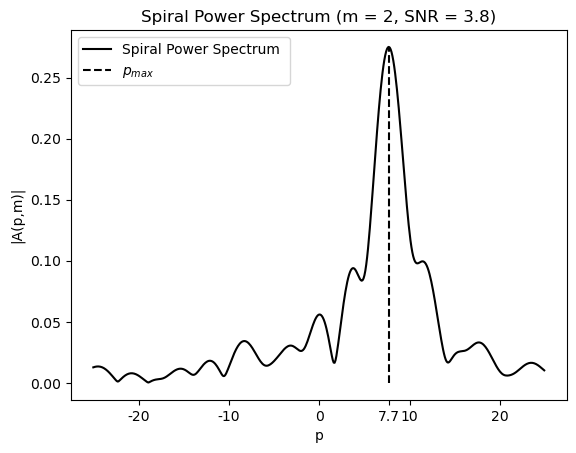

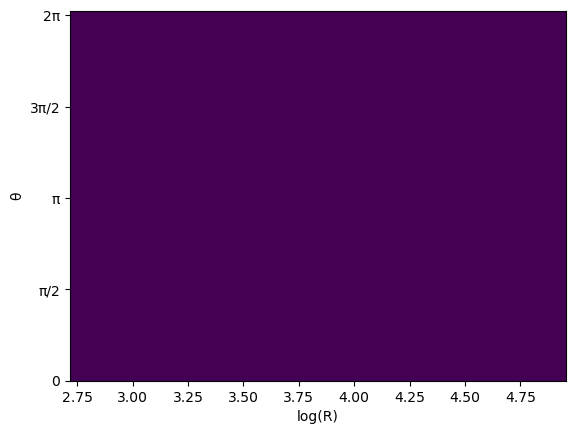

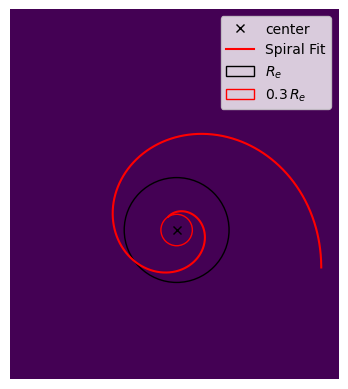

In [35]:
phi, theta = gfits.Spiral_Fourier_Transform(Empty_Comp[:,:,0],Empty_Table[0],0.3,2,True,False)

In [36]:
Test_Image = Empty_Comp[:,:,0]
Test_Table = Empty_Table[0]

In [37]:
# Want to examine pitch angle stability g - band
Inner_radii_multiples, phi_array_test, Relative_A_p_max_array = gfits.pitch_angle_against_radius(Test_Image,Test_Table,N=2.8)



In [38]:
A, A_p_m, p, SN_w, p_max, SN_m, phi = gfits.Spiral_power_spec(Test_Image,Test_Table,0.3,2,byte_order=False)


In [39]:
Empty_Table[0]

<Row index=0>
       log_n             log_re              mag                 q                 theta                x                 y        
      float64           float64            float64            float64             float64            float64           float64     
------------------- ---------------- ------------------- ------------------ ------------------- ----------------- -----------------
-0.5115816753128385 1.70318678291276 -13.679374441376423 0.9548284061500796 -1.0916914378156939 2.201177901359973 34.13391807989434

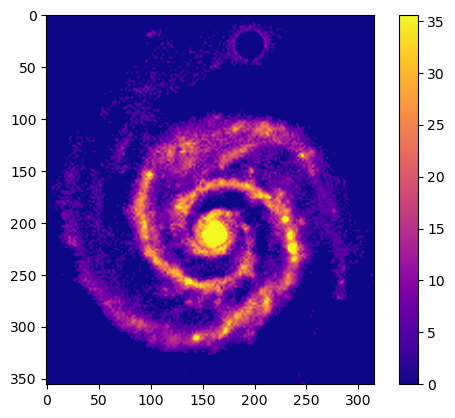

In [40]:
vmin, vmax = np.percentile(Empty_Comp[:,:,0], (0.5, 99.5))
plt.imshow(Empty_Comp[:,:,0],vmin=vmin,vmax=vmax,cmap='plasma')
plt.colorbar()

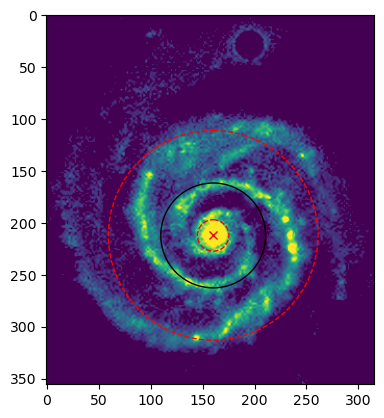

In [41]:
gfits.Overlay_table_info(Test_Image,Test_Table,0.3,2)

In [42]:
# Need to modify the table to set the fit centre to thye intensity centre
bulge_intensity = np.nanmax(Test_Image)
bulge_pos = np.asarray(np.argwhere(Test_Image == bulge_intensity))


# Modify Table

Test_Table['x'] = int(bulge_pos[0,1]) - Test_Image.shape[1]/2
Test_Table['y'] = int(bulge_pos[0,0]) - Test_Image.shape[0]/2


Test_Table,bulge_pos

(<Row index=0>
        log_n             log_re              mag                 q                 theta           x       y   
       float64           float64            float64            float64             float64       float64 float64
 ------------------- ---------------- ------------------- ------------------ ------------------- ------- -------
 -0.5115816753128385 1.70318678291276 -13.679374441376423 0.9548284061500796 -1.0916914378156939     4.0    33.0,
 array([[211, 162]]))

In [43]:
print(phi_array_test.shape)
#phi_array_test

(70, 6)


In [44]:
def plot_pitch_angle_relative_power(Candidate,phi_array,Inner_radii_multiples,relative_power):
    M_str_arr = np.array(['m = 1','m = 2','m = 3','m = 4','m = 5','m = 6'])

    # create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    #print ("Plot: phi_array=\n",phi_array.shape, phi_array)
    # plot the first subplot
    avg_pitch = np.around(np.mean(phi_array[:,1]),1)
    fig.suptitle('{} Average winding angle (m=2): {}\u00B0'.format(Candidate,avg_pitch))
    axs[0].set_ylabel('Pitch angle (deg)')
    axs[0].set_xlabel('Inner Radius / $R_e$')
    for i in range(0,len(M_str_arr)):
        if i == 1:
            axs[0].plot(Inner_radii_multiples,phi_array[:,i],c='k')
        else:
            axs[0].plot(Inner_radii_multiples,phi_array[:,i],linestyle='--')   
    axs[0].set_ylim(-90,90)    
    axs[0].legend(M_str_arr)

    # plot the second subplot
    axs[1].set_xlabel('Inner Radius/$R_e$')
    axs[1].set_ylabel('Relative Power')
    for i in range(0,relative_power.shape[1]):
        if i == 1:
            axs[1].plot(Inner_radii_multiples,relative_power[:,i],c='k')
        else:
            axs[1].plot(Inner_radii_multiples,relative_power[:,i],linestyle='--')
        
    axs[1].legend(M_str_arr)

    # adjust layout and spacing
    plt.tight_layout()

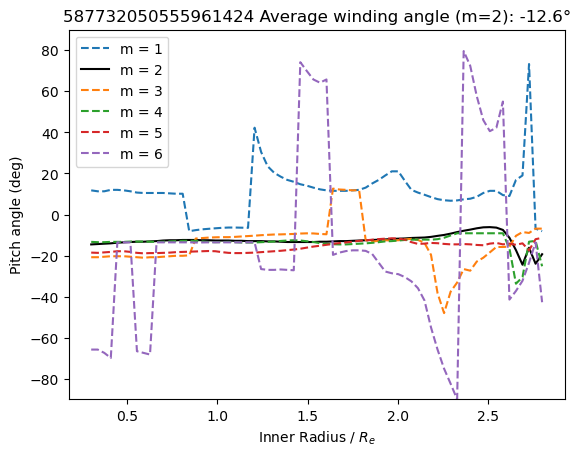

In [45]:
gfits.plot_radial_pitch_angle_dependance('587732050555961424',phi_array_test,Inner_radii_multiples)
#plt.ylim(-80,40)

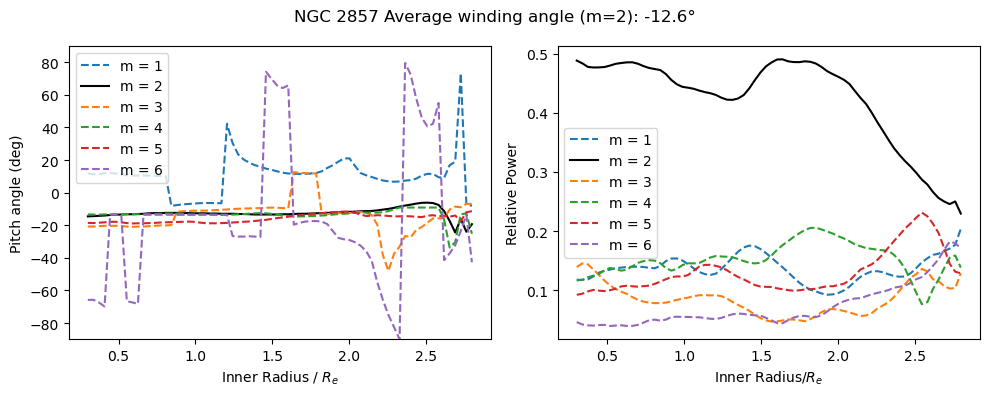

In [46]:
plot_pitch_angle_relative_power('NGC 2857',phi_array_test,Inner_radii_multiples,Relative_A_p_max_array)


In [47]:
# Error on the angle over the stable region:

# Stable between ~ 0.3-2.1 R_e

# Select dominant harmonic mode with highest average power
m = np.argmax(np.average(Relative_A_p_max_array,axis=0))

# Get Pitch angle data:
Stable_inner = 0.3
Stable_outer = 2.1

Stable_radii_m = Inner_radii_multiples[int(np.argwhere(Inner_radii_multiples == Stable_inner)):int(np.argwhere(Inner_radii_multiples > Stable_outer)[0])]
Stable_pitch   = phi_array_test[int(np.argwhere(Inner_radii_multiples == Stable_inner)):
    int(np.argwhere(Inner_radii_multiples > Stable_outer)[0])][:,m]

#print(Stable_radii_m.shape,Stable_pitch.shape) # Check everything is the same size still

# Get std dev of stable region
sigma_ = np.std(Stable_pitch)

# Work out where 90% R_max is

height,width = Test_Image.shape
x0 = np.array([Test_Image.shape[1]/2 + np.asarray(Test_Table['x'])]).astype(int)
y0 = np.array([Test_Image.shape[0]/2 + np.asarray(Test_Table['y'])]).astype(int)
R_e_pix = 10**(Test_Table['log_re'])
max_radius = min(x0, y0, width-x0, height-y0)
max_lim_R_e = (max_radius*0.9)/R_e_pix

# Therefore Beta:
beta_  = Stable_inner - max_lim_R_e

# lambda:
lambda_ = Stable_outer - Stable_inner

disk_fraction = lambda_/max_lim_R_e

# epsilon:
p_step = 0.1
epsilon = np.arctan2(-p_step,m)

# Calculate pitch angle error

avg_phi = np.average(Stable_pitch)
E_phi = np.sqrt((beta_*sigma_/lambda_)**2 + epsilon**2)

print('Spiral pitch angle: ',np.around(avg_phi,2),'±',np.around(E_phi[0],2),' degrees over ',np.around(disk_fraction[0],3),' of the galactic disk')
print('\n ',E_phi,beta_,sigma_,lambda_,epsilon)

Spiral pitch angle:  -12.92 ± 0.81  degrees over  0.696  of the galactic disk

  [0.81370459] [-2.28478086] 0.6362270491036127 1.8 -0.09966865249116204


In [48]:
# Can assume the Spiral is stable over 2 R_e

# Generate a set of spiral points using the information
# Going to try with a Boolean array instead
# Get image info:
height, width = Test_Image.shape[:2]   

R_e = 10**Test_Table['log_re']
x_centre = int(Test_Table['x'] + width/2)
y_centre = int(Test_Table['y'] + height/2)

# Create Polar Spiral
A_p_max = A_p_m[np.argmax(A_p_m)]
argument = np.radians(35)#np.angle(A_p_max)#np.radians(35)
print(argument)
argument_2 = np.radians(35+180)
r_0 = 1                                     # Scale 1:1 pix
theta = np.linspace(2*np.pi,8*(np.pi),3600)
phi = -13#-14.560275619356032 #np.degrees(np.arctan((0-m)/p_max))


#===================================================================
# Add uncertainty curves 
phi_ERR = E_phi

r_low = r_0 *np.exp(theta*np.abs(np.tan(np.radians(phi-phi_ERR)))) 
r_high = r_0 *np.exp(theta*np.abs(np.tan(np.radians(phi+phi_ERR)))) 

x = r_low*np.cos(theta)
y = r_low*np.sin(theta) 
vector_low = np.stack([x,y],axis=1).T

x = r_high*np.cos(theta)
y = r_high*np.sin(theta) 
vector_high = np.stack([x,y],axis=1).T

rot_mat = np.array([[np.cos(argument),-np.sin(argument)],
                [np.sin(argument), np.cos(argument)]])

rot_mat_2 = np.array([[np.cos(argument_2),-np.sin(argument_2)],
                [np.sin(argument_2), np.cos(argument_2)]])

rotated_vector_low = rot_mat @ vector_low
rotated_vector_2_low = rot_mat_2 @ vector_low

x_low = rotated_vector_low[0] #+ x_centre
y_low = rotated_vector_low[1] #+ y_centre

x_2low = rotated_vector_2_low[0] #+ x_centre
y_2low = rotated_vector_2_low[1] #+ y_centre

rotated_vector_high = rot_mat @ vector_high
rotated_vector_2_high = rot_mat_2 @ vector_high

x_high = rotated_vector_high[0] #+ x_centre
y_high = rotated_vector_high[1] #+ y_centre

x_2high = rotated_vector_2_high[0] #+ x_centre
y_2high = rotated_vector_2_high[1] #+ y_centre


#===================================================================

r = r_0 *np.exp(theta*np.abs(np.tan(np.radians(phi)))) 

# Convert to Cartesian
x = r*np.cos(theta)
y = r*np.sin(theta) 
vector = np.stack([x,y],axis=1).T

rot_mat = np.array([[np.cos(argument),-np.sin(argument)],
                [np.sin(argument), np.cos(argument)]])

rot_mat_2 = np.array([[np.cos(argument_2),-np.sin(argument_2)],
                [np.sin(argument_2), np.cos(argument_2)]])

rotated_vector = rot_mat @ vector
rotated_vector_2 = rot_mat_2 @ vector

x_ = rotated_vector[0] #+ x_centre
y_ = rotated_vector[1] #+ y_centre

x_2 = rotated_vector_2[0] #+ x_centre
y_2 = rotated_vector_2[1] #+ y_centre
print(x_.shape)
range_min = 0.3 * R_e
range_max = 2.1 * R_e

# Create a boolean mask to filter out points outside the range
mask = (np.sqrt(x_**2 + y_**2) >= range_min) & (np.sqrt(x_**2 + y_**2) <= range_max)
masklow = (np.sqrt(x_low**2 + y_low**2) >= range_min) & (np.sqrt(x_low**2 + y_low**2) <= range_max)
maskhigh = (np.sqrt(x_high**2 + y_high**2) >= range_min) & (np.sqrt(x_high**2 + y_high**2) <= range_max)

# Apply the mask to the data
x_trimmed = x_[mask] + x_centre
y_trimmed = (y_[mask]) + y_centre

x_2_trimmed = x_2[mask] + x_centre
y_2_trimmed = (y_2[mask]) + y_centre

# Low
#=====

x_trimmedlow = x_low[masklow] + x_centre
y_trimmedlow = (y_low[masklow]) + y_centre

x_2_trimmedlow = x_2low[masklow] + x_centre
y_2_trimmedlow = (y_2low[masklow]) + y_centre

# High
#======

x_trimmedhigh = x_high[maskhigh] + x_centre
y_trimmedhigh = (y_high[maskhigh]) + y_centre

x_2_trimmedhigh = x_2high[maskhigh] + x_centre
y_2_trimmedhigh = (y_2high[maskhigh]) + y_centre

0.6108652381980153
(3600,)


(-0.5, 315.5, 355.5, -0.5)

<Figure size 640x480 with 0 Axes>

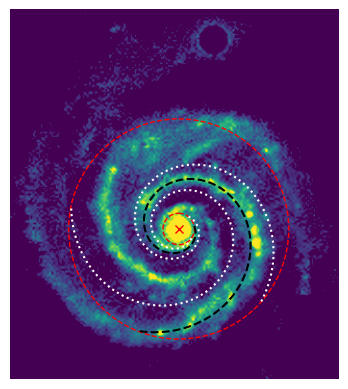

<Figure size 640x480 with 0 Axes>

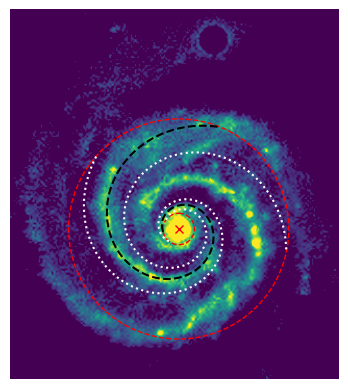

In [49]:
plt.figure()
gfits.Overlay_table_info(Test_Image,Test_Table,0.3,2.1,R_e_on=False)
# Arm 1
plt.plot(x_trimmed,y_trimmed,'black',linestyle='--')
# Uncertainty
plt.plot(x_trimmedlow,y_trimmedlow,'white',linestyle=':')
plt.plot(x_trimmedhigh,y_trimmedhigh,'white',linestyle=':')
plt.axis('off')

plt.figure()
gfits.Overlay_table_info(Test_Image,Test_Table,0.3,2.1,R_e_on=False)
# Arm 2
plt.plot(x_2_trimmed,y_2_trimmed,'black',linestyle='--')
# Uncertainty
plt.plot(x_2_trimmedlow,y_2_trimmedlow,'white',linestyle=':')
plt.plot(x_2_trimmedhigh,y_2_trimmedhigh,'white',linestyle=':')
plt.axis('off')

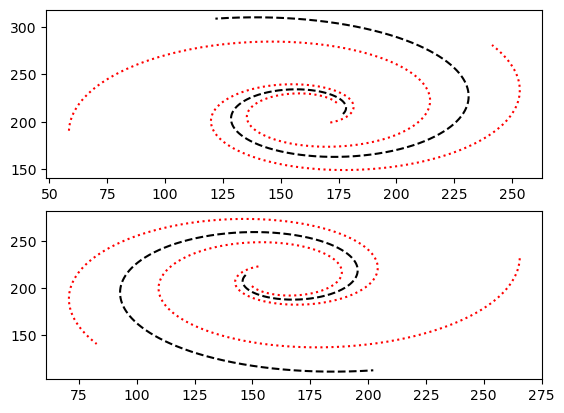

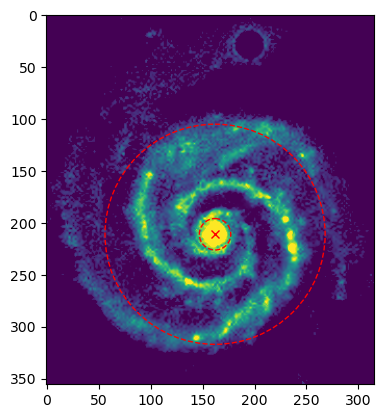

In [50]:
# Display as Subplots
# Create a figure with subplots
fig, axes = plt.subplots(2, 1)

# Plot 1
axes[0].plot(x_trimmed, y_trimmed, 'black', linestyle='--')
axes[0].plot(x_trimmedlow, y_trimmedlow, 'red', linestyle=':')
axes[0].plot(x_trimmedhigh, y_trimmedhigh, 'red', linestyle=':')
gfits.Overlay_table_info(Test_Image, Test_Table, 0.3, 2.1, R_e_on=False)

# Plot 2
axes[1].plot(x_2_trimmed, y_2_trimmed, 'black', linestyle='--')
axes[1].plot(x_2_trimmedlow, y_2_trimmedlow, 'red', linestyle=':')
axes[1].plot(x_2_trimmedhigh, y_2_trimmedhigh, 'red', linestyle=':')
#axes[1].gfits.Overlay_table_info(Test_Image, Test_Table, 0.3, 2.1, R_e_on=False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

In [51]:
# Stack spiral points into N x 2 array
Spiral_arm_1_points = np.vstack([x_trimmed,y_trimmed]).T
Spiral_arm_2_points = np.vstack([x_2_trimmed,y_2_trimmed]).T

Spiral_arm_2_points, Spiral_arm_1_points

(array([[147.10749069, 213.76356252],
        [147.07518544, 213.68877551],
        [147.04323372, 213.61372963],
        ...,
        [201.13048121, 112.77580614],
        [201.6923511 , 112.86350513],
        [202.25443321, 112.95425533]]),
 array([[176.89250931, 208.23643748],
        [176.92481456, 208.31122449],
        [176.95676628, 208.38627037],
        ...,
        [122.86951879, 309.22419386],
        [122.3076489 , 309.13649487],
        [121.74556679, 309.04574467]]))

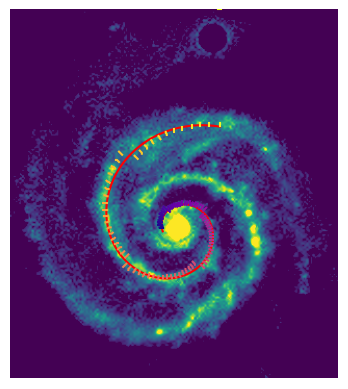

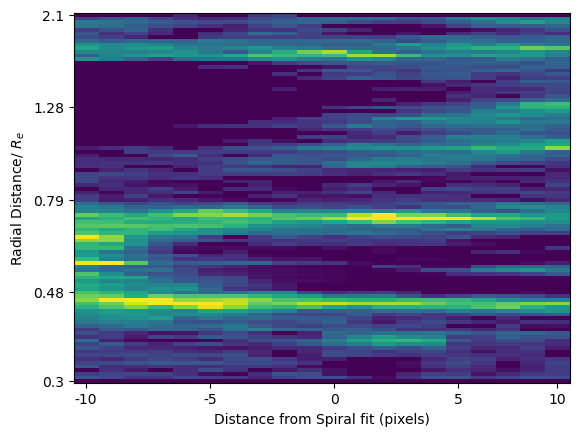

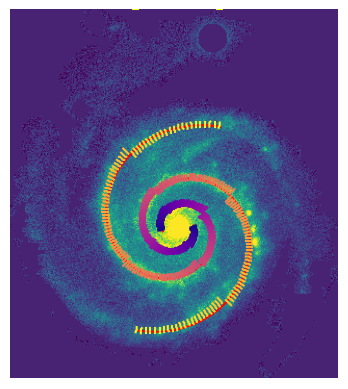

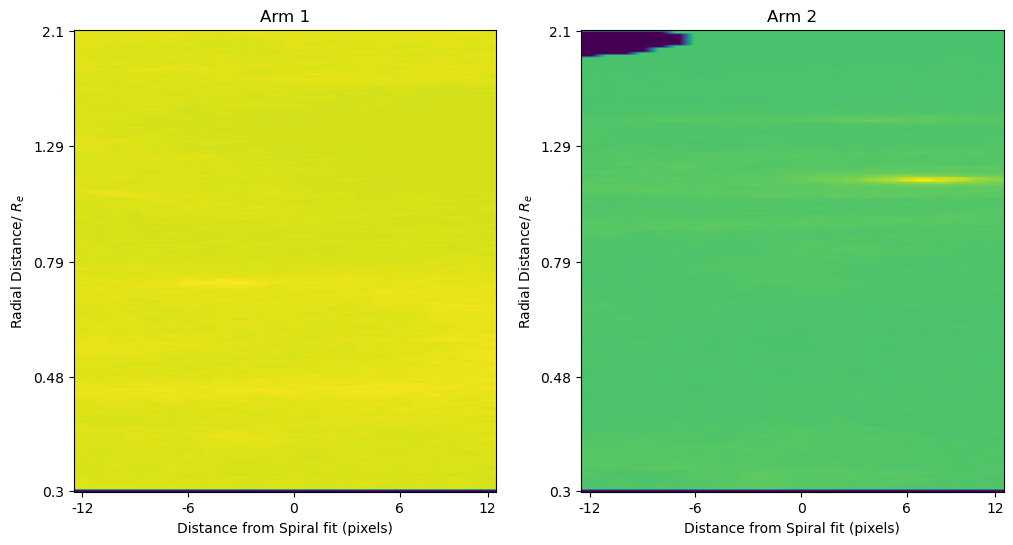

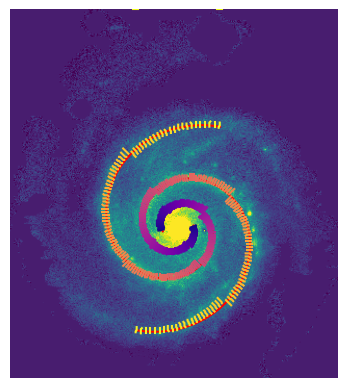

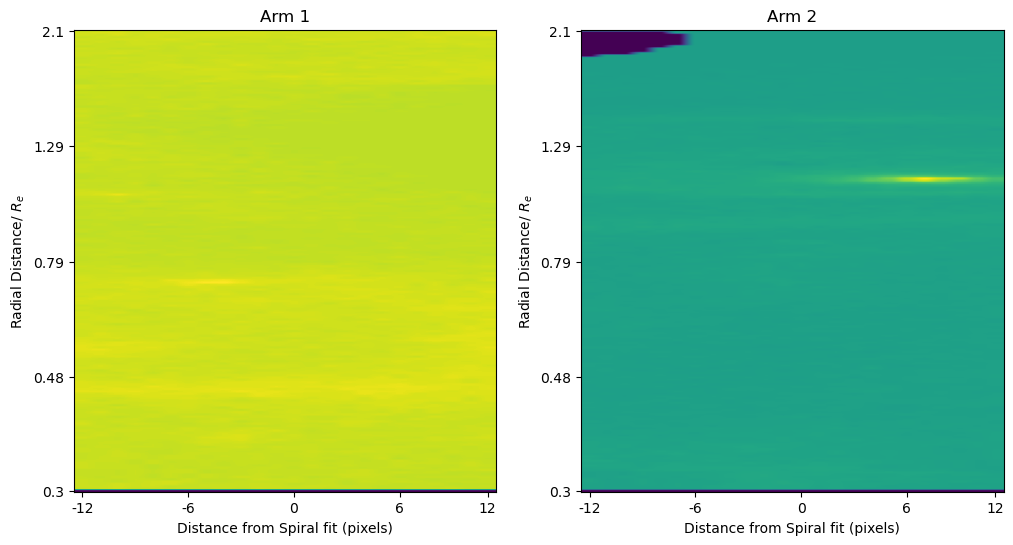

In [57]:
# Cool so need to normal sample along spiral arms

# Go and get the non FICL image - the original
Original_Test_G = gfits.Read('/home/borge/Data/Test_batch/587732050555961424ga.fits.gz') 
Original_Test_R = gfits.Read('/home/borge/Data/Test_batch/587732050555961424ra.fits.gz') 



stacked_image_1_I= gfits.Spiral_normal_distributions(Test_Image,Test_Table,Spiral_arm_2_points,100,10,True,False)#,spiral_points2=Spiral_arm_1_points)
stacked_image_1_O_G= gfits.Spiral_normal_distributions(Original_Test_G,Test_Table,Spiral_arm_2_points,200,12,True,False,spiral_points2=Spiral_arm_1_points)
stacked_image_1_O_R= gfits.Spiral_normal_distributions(Original_Test_R,Test_Table,Spiral_arm_2_points,200,12,True,False,spiral_points2=Spiral_arm_1_points)

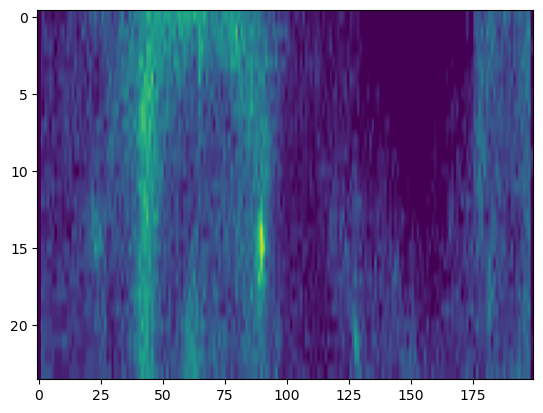

In [53]:
plt.imshow(stacked_image_1_O_G.T,vmin=1000,vmax=1075,aspect='auto')

/tmp/ipykernel_16742/3466222765.py:1: RuntimeWarning: invalid value encountered in divide
  G_div_R = -2.5*np.log10(stacked_image_1_O_G.T/stacked_image_1_O_R.T)


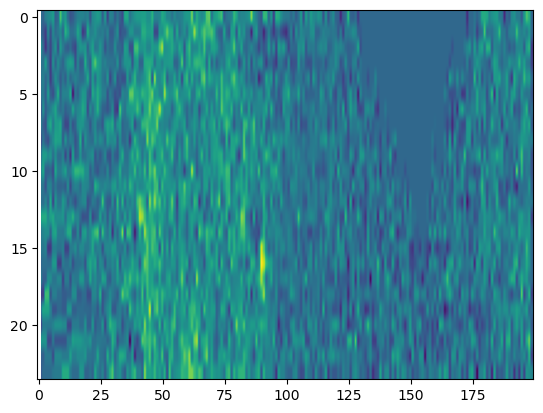

In [54]:
G_div_R = -2.5*np.log10(stacked_image_1_O_G.T/stacked_image_1_O_R.T)
plt.imshow(G_div_R,aspect='auto')

/tmp/ipykernel_16742/50928941.py:4: RuntimeWarning: invalid value encountered in divide
  stacked_G_div_R = -2.5*np.log10(stacked_image_1_O_G/stacked_image_1_O_R)
/tmp/ipykernel_16742/50928941.py:8: RuntimeWarning: invalid value encountered in divide
  averaged_G_div_R = -2.5*np.log10(averaged_radially_G/averaged_radially_R)


array([       nan, 0.0070672 , 0.00739641, 0.0096455 , 0.00817303,
       0.00906591, 0.00752274, 0.00672268, 0.00703875, 0.00680348,
       0.00667111, 0.00849882, 0.00810854, 0.00844159, 0.00919026,
       0.00724094, 0.00606023, 0.00704549, 0.00809805, 0.00705489,
       0.00720949, 0.00710677, 0.00733955, 0.00871959, 0.00847666,
       0.00574234, 0.00812076, 0.00588209, 0.00703705, 0.00806417,
       0.00905899, 0.00704475, 0.0088317 , 0.00861161, 0.01046592,
       0.00831723, 0.00694917, 0.01202476, 0.00786724, 0.01189596,
       0.00850209, 0.00969736, 0.01015601, 0.00837196, 0.0079195 ,
       0.00723932, 0.00737554, 0.01050818, 0.00873721, 0.00957885,
       0.00798931, 0.00814507, 0.00800448, 0.00638813, 0.00731696,
       0.00674729, 0.00870609, 0.00464644, 0.00846509, 0.00889113,
       0.00930682, 0.00890513, 0.00941279, 0.00851911, 0.01061503,
       0.00936873, 0.00810423, 0.0096899 , 0.00814331, 0.00630276,
       0.00700647, 0.00549851, 0.0080427 , 0.00874327, 0.00931

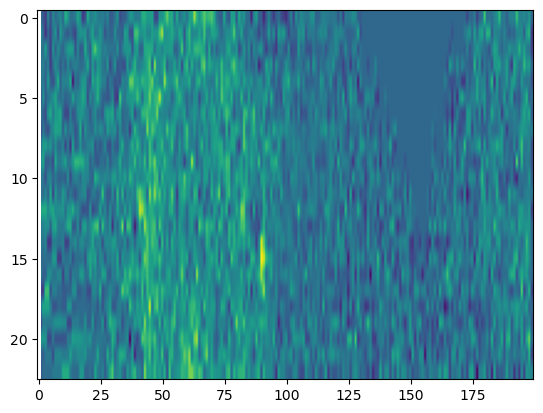

In [55]:
averaged_radially_G = np.average(stacked_image_1_O_G.T,axis=0)
averaged_radially_R = np.average(stacked_image_1_O_R.T,axis=0)

stacked_G_div_R = -2.5*np.log10(stacked_image_1_O_G/stacked_image_1_O_R)

plt.imshow(stacked_G_div_R[:,1:].T,aspect='auto')

averaged_G_div_R = -2.5*np.log10(averaged_radially_G/averaged_radially_R)
std_2857 = np.std(stacked_G_div_R[:,1:],axis=1)


distamce_from_fit = np.linspace(-10,10,len(averaged_radially_G))

std_2857

ValueError: Axis limits cannot be NaN or Inf

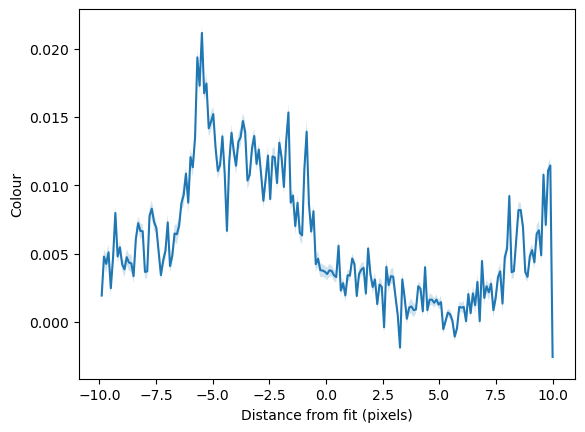

In [56]:
plt.plot(distamce_from_fit,averaged_G_div_R) # not sure
plt.fill_between(distamce_from_fit,averaged_G_div_R-(std_2857/np.sqrt(len(std_2857))),
                 averaged_G_div_R+(std_2857/np.sqrt(len(std_2857))),alpha=0.2)

N = len(distamce_from_fit)  # Array length
i = int(len(distamce_from_fit)/2)  # Index to focus on

# Generate a Gaussian distribution
mean = i
std_dev = N / 5  # Adjust the standard deviation to control the focus
from scipy.stats import norm
gaussian = norm.pdf(np.arange(N), mean, std_dev)

# Normalize the weights to sum up to 1
weights = gaussian / np.sum(gaussian)


# Perform polynomial regression
degree = 8 # Set the degree of the polynomial
coeffs = np.polyfit(distamce_from_fit,averaged_G_div_R, degree,w=weights)
poly = np.poly1d(coeffs)

# Generate points for the smooth line
x_smooth = np.linspace(-10, 10, 100)
y_smooth = poly(x_smooth)

plt.plot(x_smooth, y_smooth, color='r', label='Smooth Line')

# Plotting Utilities
plt.xlabel('Distance from fit (pixels)')
plt.ylabel('Colour')
plt.ylim(np.min(averaged_G_div_R)-0.001,np.max(averaged_G_div_R)+0.001)
plt.legend(['Data','Uncertainty','$n=10$ Polyfit'])

Text(0.5, 0, 'Distance from fit (pixels)')

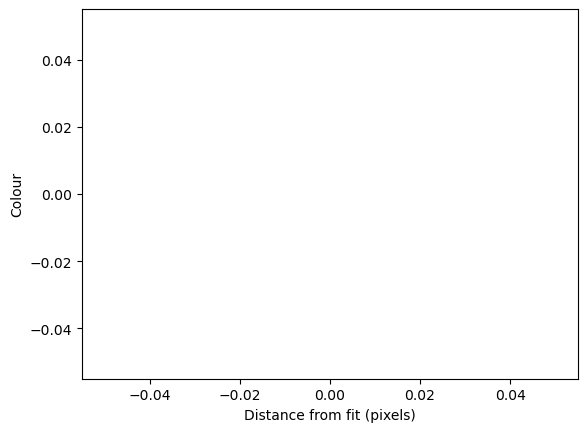

In [ ]:
plt.plot(distamce_from_fit,np.average(G_div_R,axis=0))
plt.ylabel('Colour')
plt.xlabel('Distance from fit (pixels)')